In [ ]:
PROJECT 2 PROPOSAL LEVEL 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df = pd.read_csv('Mall_Customers.csv')

In [2]:
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())

Dataset Shape: (200, 5)

First few rows:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
print("\nMissing Values:")
print(df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())


Missing Values:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Duplicate Rows: 0


In [4]:
print("\nGender Distribution:")
print(df['Genre'].value_counts())
print("\nGender Distribution (%):")

print(df['Genre'].value_counts(normalize=True) * 100)


Gender Distribution:
Genre
Female    112
Male       88
Name: count, dtype: int64

Gender Distribution (%):
Genre
Female    56.0
Male      44.0
Name: proportion, dtype: float64


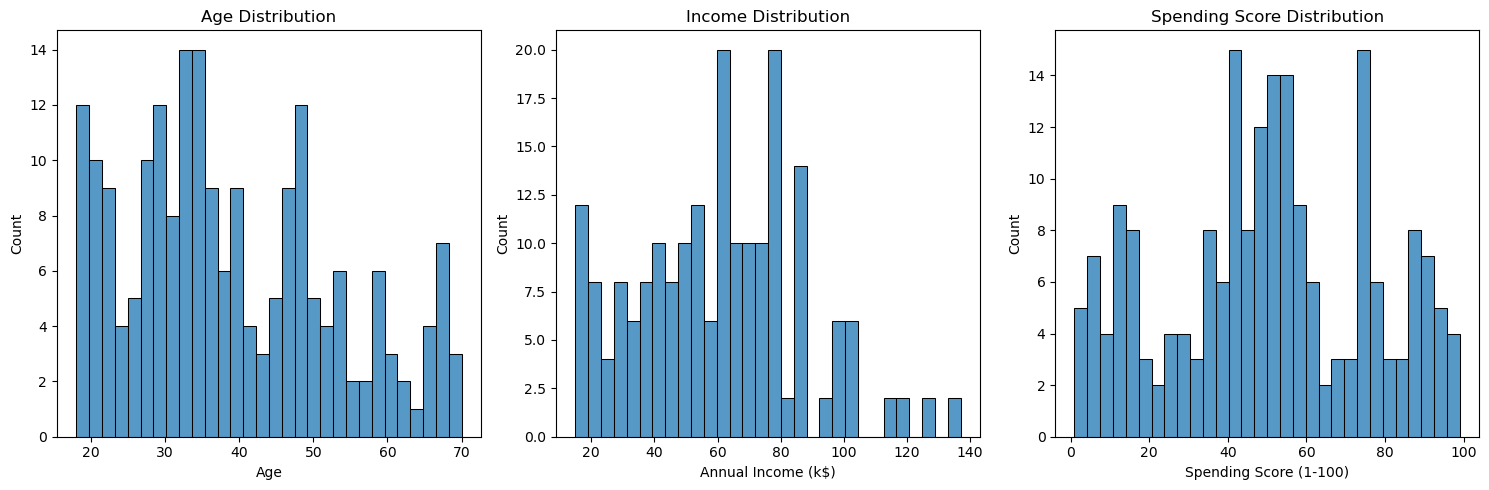

In [5]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data=df, x='Age', bins=30)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(data=df, x='Annual Income (k$)', bins=30)
plt.title('Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(data=df, x='Spending Score (1-100)', bins=30)
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()

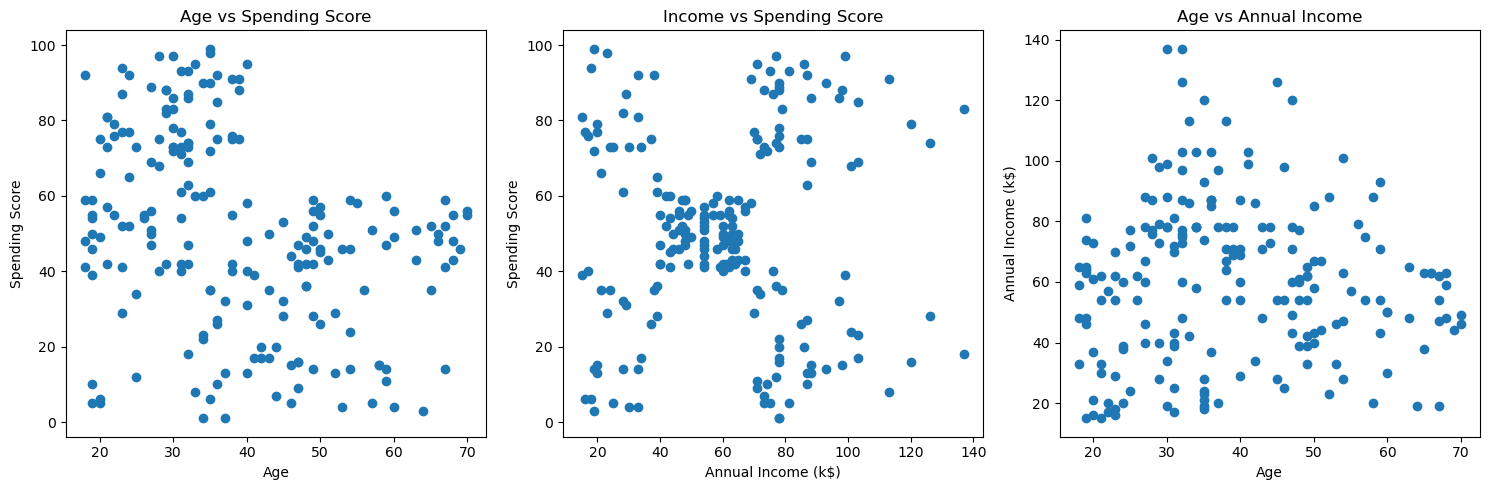

In [6]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(df['Age'], df['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Age vs Spending Score')

plt.subplot(1, 3, 2)
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title('Income vs Spending Score')

plt.subplot(1, 3, 3)
plt.scatter(df['Age'], df['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income')

plt.tight_layout()
plt.show()

In [7]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\avinash\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\avinash\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\avinash\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\avinash\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak o

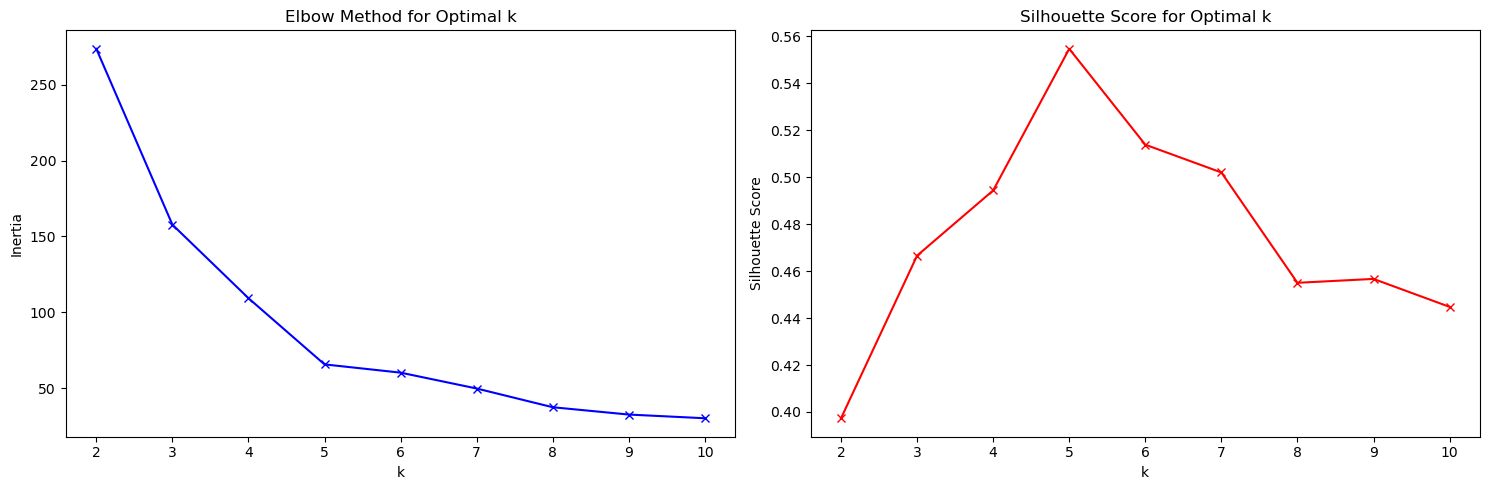

In [13]:
inertias = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')

plt.tight_layout()
plt.show()

C:\Users\avinash\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


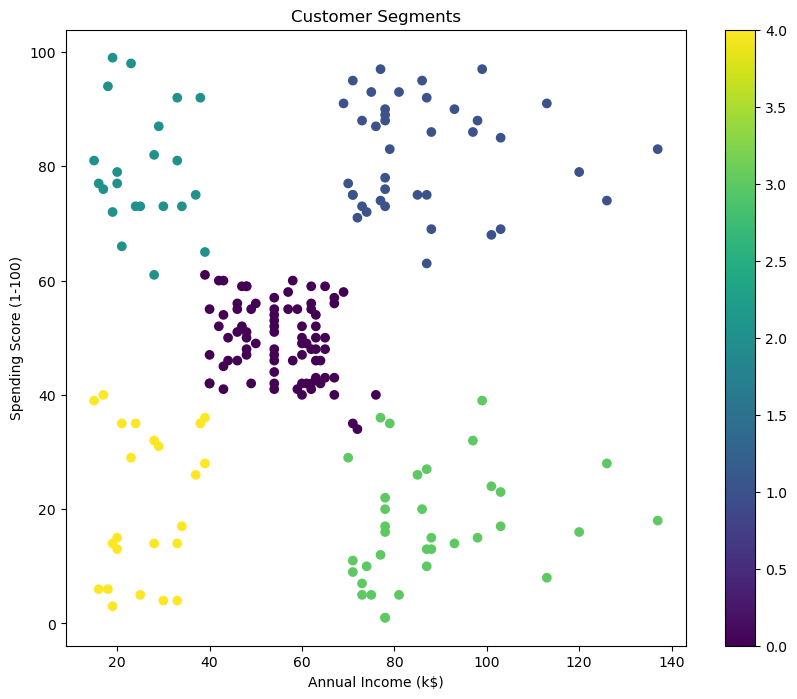

In [14]:
optimal_k = 5 
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.colorbar(scatter)
plt.show()

In [15]:
cluster_stats = df.groupby('Cluster').agg({'Age': 'mean','Annual Income (k$)': 'mean','Spending Score (1-100)': 'mean','CustomerID': 'count'}).round(2)
print("\nCluster Characteristics:")
print(cluster_stats)


Cluster Characteristics:
           Age  Annual Income (k$)  Spending Score (1-100)  CustomerID
Cluster                                                               
0        42.72               55.30                   49.52          81
1        32.69               86.54                   82.13          39
2        25.27               25.73                   79.36          22
3        41.11               88.20                   17.11          35
4        45.22               26.30                   20.91          23


In [16]:
df.to_csv('customer_segments_results.csv', index=False)
cluster_stats.to_csv('cluster_statistics_results.csv')

In [17]:
gender_cluster_stats = df.groupby(['Cluster', 'Genre']).agg({'CustomerID': 'count','Age': 'mean','Annual Income (k$)': 'mean',
                                                             'Spending Score (1-100)': 'mean'}).round(2)
print("\nCluster Characteristics by Gender:")
print(gender_cluster_stats)


Cluster Characteristics by Gender:
                CustomerID    Age  Annual Income (k$)  Spending Score (1-100)
Cluster Genre                                                                
0       Female          48  40.90               55.35                   49.00
        Male            33  45.36               55.21                   50.27
1       Female          21  32.19               86.05                   81.67
        Male            18  33.28               87.11                   82.67
2       Female          13  25.46               25.69                   80.54
        Male             9  25.00               25.78                   77.67
3       Female          16  43.25               90.94                   22.06
        Male            19  39.32               85.89                   12.95
4       Female          14  43.21               27.36                   21.71
        Male             9  48.33               24.67                   19.67
